In [1]:
from cmath import sinh, tanh, cosh
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [11]:
SAMPLE_SIZE = 80
NETA_RANGE = (0.7, 0.9)
DELTA_RANGE = (0.008, 0.1)
N_RANGE = (500, 5000)
PITCH_RANGE = (50, 300)
LAMBDA_RANGE = (300, 3000)
NO_OF_VARIABLES = 5

In [12]:
def P(neta, delta, N, pitch, x, x0):
    """
    Reflected power function
    """
    sqrt = lambda v: complex(v, 0)**0.5

    g = (1.0/(neta*delta))*((x/x0)-1)
    g = g**2

    theta = neta*delta*N*pitch*sqrt(1-g)/x

    nr = sinh(theta)**2
    dr = (cosh(theta)**2)-g

    return abs(nr/dr)


def reflected_samples(neta:float, delta:float, N:float, pitch:float, x0:float):
    """
    returns : numpy array 
    """
    
    # uniformly sample the function
    # generate sample points
    d = (LAMBDA_RANGE[1] - LAMBDA_RANGE[0])/SAMPLE_SIZE
    x = LAMBDA_RANGE[0]
    
    Y = []
    
    for _ in range(SAMPLE_SIZE):
        Y.append(P(neta, delta, N, pitch, x, x0))
        x = x + d
    
    return np.array(Y)


def generate_data(m):
    """
    generates input and output samples given input samples
    """
    
    X = np.random.rand(m, NO_OF_VARIABLES)
    Y = []

    for sample in X:
        neta = NETA_RANGE[0]+(NETA_RANGE[1]-NETA_RANGE[0])*sample[0]
        delta = DELTA_RANGE[0]+(DELTA_RANGE[1]-DELTA_RANGE[0])*sample[1]
        N = N_RANGE[0]+(N_RANGE[1]-N_RANGE[0])*sample[2]
        pitch = PITCH_RANGE[0]+(PITCH_RANGE[1]-PITCH_RANGE[0])*sample[3]
        x0 = LAMBDA_RANGE[0]+(LAMBDA_RANGE[1]-LAMBDA_RANGE[0])*sample[4]

        Y.append(reflected_samples(neta, delta, N, pitch, x0))
    
    Y = np.array(Y)
    
    return X, Y

In [13]:
%time
X, Y = generate_data(400000)

CPU times: user 9 µs, sys: 0 ns, total: 9 µs
Wall time: 16.5 µs


In [14]:
print(X.shape, Y.shape)

(400000, 5) (400000, 80)


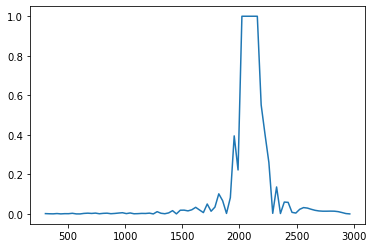

In [19]:
d = (LAMBDA_RANGE[1] - LAMBDA_RANGE[0])/SAMPLE_SIZE
x = []
start = LAMBDA_RANGE[0]

for _ in range(SAMPLE_SIZE):
    x.append(start)
    start = start + d

x = np.array(x)

plt.plot(x, Y[547])

In [20]:
data = dict()
data['X'] = X
data['Y'] = Y

In [21]:
np.savez('data_80_samples400000', X=X, Y=Y)

In [11]:
with np.load('data_100_samles.npz') as data:
    x1 = data['X']
    y1 = data['Y']

FileNotFoundError: [Errno 2] No such file or directory: 'data_100_samles.npz'

In [ ]:
print(x1.shape, y1.shape)

In [ ]:
plt.plot(x, y1[0])